<a href="https://colab.research.google.com/github/AleR26/ColabFiles/blob/main/PracticaRegresionLinealMultiple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Maestría en Inteligencia Artificial y Analítica de Datos

## Programación para Analítica Descriptiva y Predictiva - Marzo 2025
## Práctica: Práctica: Regresión Lineal Múltiple
---


## Datos del Estudiante

*   Apellidos y Nombre: Alejandra Margarita Rivas Simental
*   Matrícula:263162

---



##  Objetivo de aprendizaje
Al finalizar esta práctica, el estudiante será capaz de **aplicar regresión lineal múltiple utilizando Scikit-Learn para modelar la relación entre varias variables independientes y una variable dependiente**, verificar los supuestos del modelo, interpretar los coeficientes, analizar la correlación entre predictores y evaluar el rendimiento del modelo utilizando métricas como el MSE, RMSE y R².

Datos
Trabajarás con el archivo `advertising.csv`, que contiene información sobre el gasto publicitario en diferentes medios y las ventas obtenidas:

-`TV`: inversión en publicidad televisiva.

-`Radio`: inversión en publicidad en radio.

-`Newspaper`: inversión en publicidad en periódicos.

`Sales`: ventas del producto (variable dependiente).

## Parte 1: Carga de datos y bibliotecas
1. Importa las bibliotecas necesarias.
2. Carga el archivo `advertising.csv`.
3. Muestra las primeras filas del dataframe.
4. Describe estadísticamente las variables.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("/content/sample_data/advertising.csv")
print("Primeras filas del dataset:")
print(df.head())
print("\nEstadistica de las variables\n", df.describe())

Primeras filas del dataset:
      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9

Estadistica de las variables
                TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000



Comprobando valores nulos:
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


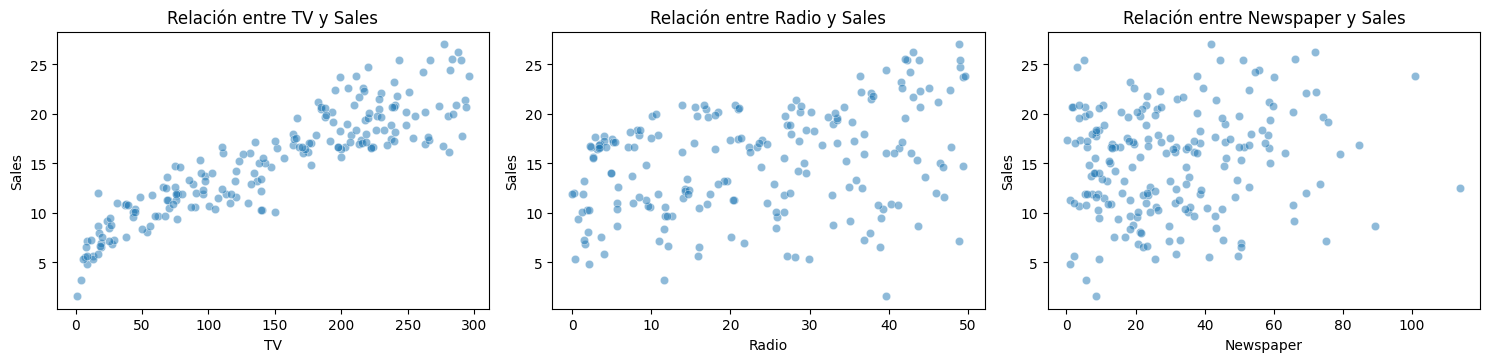

In [3]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Comprobamos si hay valores nulos
print("\nComprobando valores nulos:")
print(df.isnull().sum())

# 4. Visualización de scatterplots entre todas las características y la variable objetivo 'PRICE'
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns[:-1]):  # Excluimos la columna 'PRICE'
    plt.subplot(3, 3, i+1)
    sns.scatterplot(x=df[column], y=df['Sales'], alpha=0.5)
    plt.title(f"Relación entre {column} y Sales")
    plt.xlabel(column)
    plt.ylabel("Sales")

plt.tight_layout()
plt.show()


## Parte 2: Análisis exploratorio de los datos
### 2.1  Análisis de la Relación Lineal entre la variable dependiente y las independientes
1. Grafica dispersión entre cada variable independiente (`TV`, `Radio`, `Newspaper`) y `Sales`. Usa también regplot.
2. Interpreta visualmente la relación entre variables.

In [4]:
X = df.drop(columns='Sales')  # Características
y = df['Sales']  # Variable dependiente (ventas)

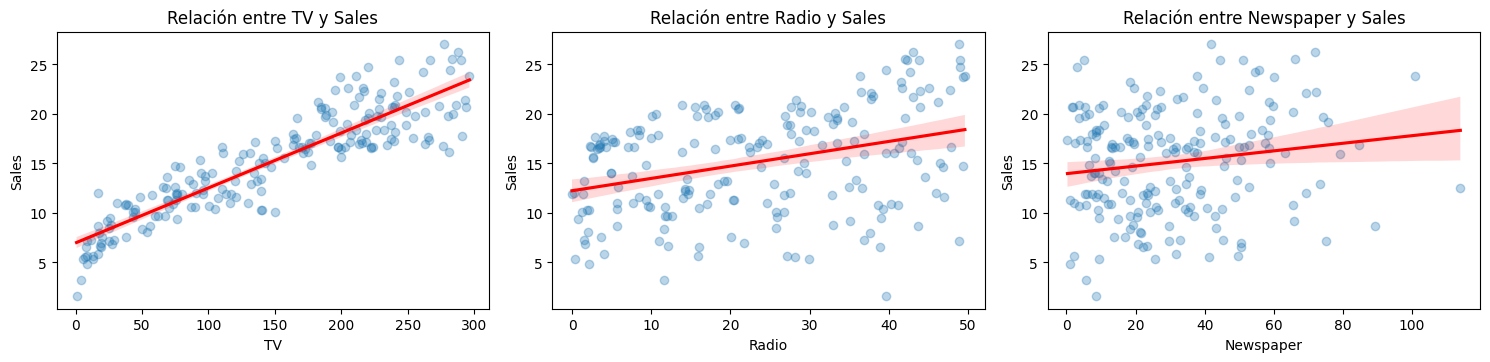

In [5]:
# Gráficos de dispersión
plt.figure(figsize=(15, 10))
for i, col in enumerate(X.columns):
    plt.subplot(3, 3, i + 1)
    sns.regplot(x=X[col], y=y, scatter_kws={'alpha':0.3}, line_kws={'color': 'red'}) # Se agrega regplot
    plt.title(f"Relación entre {col} y Sales")

plt.tight_layout()
plt.show()

### 2.2: Correlación entre variables
1. Calcula la matriz de correlación.
2. Visualízala con un heatmap.
3. Responde: ¿Qué variables están más correlacionadas con `Sales`? ¿Hay correlación alta entre predictores?

Hay una correlacion alta entre Sales y Tv:


*   Coeficiente de correlación: 0.90 (En rojo)
*   Interpretacion: Existe una correlación positiva muy fuerte entre la inversión en Publicidad de TV y las ventas.

###Conclusiones generales
Podemos ver claramente que TV es nuestra variable clave y nuestro predictor más relevante para Sales debido a su correlación positiva fuerte conclusión a mayor inversión en la TV mayores son las ventas.
Variables poco relevantes tenemos el newspaper con un coeficiente de correlación de 0.16, por lo que su impacto enm el modelo predictivo podría ser no tan significativo

Correlacion de Pearson
                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.901208
Radio      0.054809  1.000000   0.354104  0.349631
Newspaper  0.056648  0.354104   1.000000  0.157960
Sales      0.901208  0.349631   0.157960  1.000000


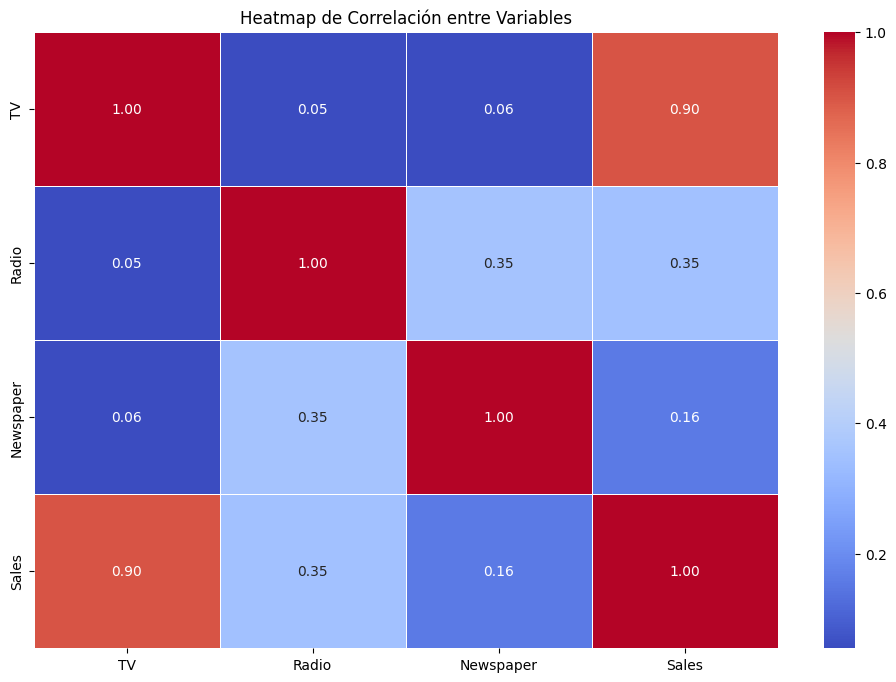

In [6]:
# Correlación y heatmap
# 5. Heatmap de correlación entre todas las variables
# Cálculo de correlación
correlacion_df = df.corr(method = 'pearson')
print(f"Correlacion de Pearson\n{correlacion_df}")
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, linewidths=0.5)
plt.title("Heatmap de Correlación entre Variables")
plt.show()

## Parte 3. Multicolinealidad
1. Calcula el VIF (Variance Inflation Factor) para cada predictor.
2. Crea un diagrama de barras  para mostrar el  VIF
3. Interpreta si hay multicolinealidad:
- ¿Alguna variable tiene un VIF mayor a 5 o mayor a 10?
**No hay ninguna variable con un VIF mayor a 5**
- ¿Qué implicaciones tiene esto para el modelo?
**Estamos en la situación ideal**


### Análisis de Multicolinealidad ###
    Variable       VIF
0      const  6.848900
1         TV  1.004611
2      Radio  1.144952
3  Newspaper  1.145187


/tmp/ipython-input-4050805489.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='VIF', y='Variable', data=vif_data, palette='coolwarm')


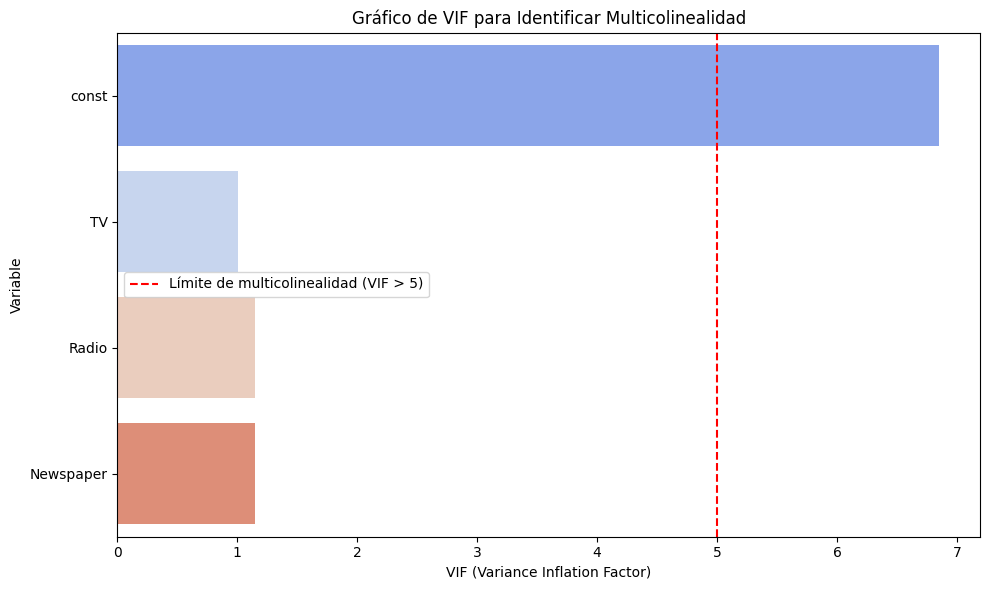

In [7]:
#Multicolinealidad


# 6. Multicolinealidad: Cálculo de VIF (Variance Inflation Factor)
# El VIF evalúa la colinealidad de cada variable con respecto a las demás. VIF > 5 o 10 indica posible multicolinealidad.

# Agregar constante para calcular el VIF
X = add_constant(df.drop(columns=['Sales']))  # Matriz de características sin la variable dependiente
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("\n### Análisis de Multicolinealidad ###")
print(vif_data)

# 7. Visualización de VIF
plt.figure(figsize=(10, 6))
sns.barplot(x='VIF', y='Variable', data=vif_data, palette='coolwarm')
plt.axvline(x=5, color='red', linestyle='--', label='Límite de multicolinealidad (VIF > 5)')
plt.xlabel('VIF (Variance Inflation Factor)')
plt.title('Gráfico de VIF para Identificar Multicolinealidad')
plt.legend()
plt.tight_layout()
plt.show()


## Parte 4: Construcción del Modelo (Todas las variables Independientes), Evaluación

### 4.1 Entrenamiento del Modelo (Todas las Variables Independientes)

1. Entrena un modelo de regresión lineal múltiple usando TV, Radio y Newspaper como variables independientes.
2. Imprime el intercepto y los coeficientes del modelo.
3. Interpreta cada uno:
¿Qué significa cada uno de los coeficientes  en términos de ventas?


*   Término independiente (intercepto) 15.130500000000001:


    *   Este es el valor de Sales cuando todas las variables independientes son igual a 0. Es decir, las ventas base cuanto la inversión a las variables es igual a cero.


*   Coeficiente de TV 4.66270024508669:
    * Este coeficiente indica que, si TV aumenta en una unidad, las ventas aumentan en promedio 4.66 unidades, manteniendo las demas variables constantes
    * En terminos sencillos a mayor inversión en promocion en TV, las ventas suben.

* Coeficiente de Radio 1.5846502733236374:
    * Este coeficiente indica que, si Radio aumenta en una unidad, las ventas en promedio aumentan 1.58 unidades, manteniendo las demas variables constantes.
    * Esto quiere decir que si a mayor inversion en promocion en Radio las ventas suben

* Coeficiente de Newspaper 0.007291868303767046:
    * Este coeficiente indica que, si Newspaper aumenta en una unidad, las ventas en promedio aumentan 0.007 unidades, manteniendo las demas variables constantes.
    * Esto quiere decir que si a mayor inversion en promocion en Newspaper las ventas suben un poco




In [8]:
#ntrenamiento del Modelo (Todas las Variables Independientes)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
model = LinearRegression()
model.fit(X_scaled,y)

LinearRegression()

In [9]:
coefficients = model.coef_
intercept = model.intercept_

print(f"\nCoeficientes estimados: {coefficients}")
print(f"Término independiente estimado: {intercept}")
#######################################################
print('\n')
equation = f"Sales = {intercept} "
for i, coef in enumerate(coefficients):
  equation += f"+ ({coef} * {X.columns[i]}) "

equation #se obtiene el modelo con los coeficientes


Coeficientes estimados: [0.         4.66270025 1.58465027 0.00729187]
Término independiente estimado: 15.130500000000001




'Sales = 15.130500000000001 + (0.0 * const) + (4.66270024508669 * TV) + (1.5846502733236374 * Radio) + (0.007291868303767046 * Newspaper) '

### 4.2 Normalidad de los residuos

1. Calcula los residuos: residuos = y - y_pred.

2. Grafica un histograma con KDE de los residuos.

3. ¿Los residuos parecen distribuirse normalmente?
Los residuos tienen una distribución hacia la izquierda, lo que indica una colas mas larga a los valores negativos.

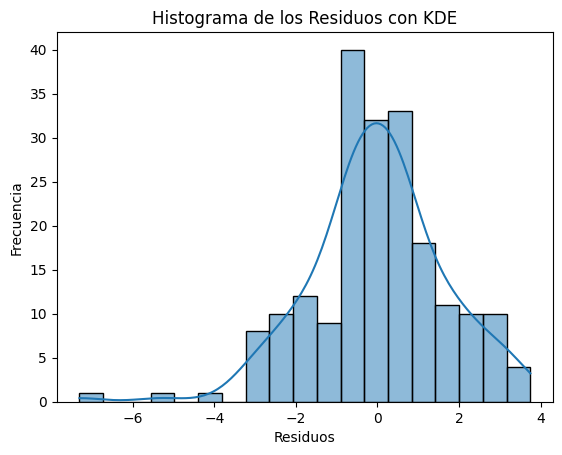

In [10]:
#Normalidad de los residuos
import scipy.stats as stats
import matplotlib.pyplot as plt

y_pred = model.predict(X_scaled)

# 1. Calcular los residuos del modelo
residuos = y - y_pred

# Grafica un histograma con KDE de los residuos
sns.histplot(residuos, kde=True)
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Histograma de los Residuos con KDE')
plt.show()

# Mostrar la gráfica
plt.show()

### 4.3. Homocedasticidad

1. Grafica los residuos contra los valores predichos.
2. ¿Observas patrones? ¿Los residuos se dispersan aleatoriamente? No se observan patrones y si se dispersan aleatoriamente lo que nos sugiere homocedasticidad

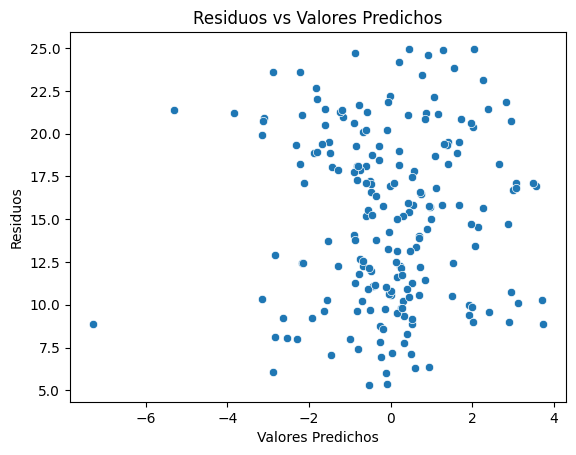

In [11]:
# Homocedasticidad
# Gráfico de residuos vs predichos
sns.scatterplot(x=residuos, y=y_pred)
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.title('Residuos vs Valores Predichos')
plt.show()

### 4.4 Q-Q Plot

1. Graficar el Q-Q Plot
2. Interpreta el gráfico: a) Si los puntos se alinean aproximadamente sobre la línea diagonal, los residuos siguen una distribución normal, b) Desviaciones sistemáticas indican asimetría o colas pesadas.
* El gráfico nos muestra una distribución normal ya que los puntos se alinean a la línea diagonal.

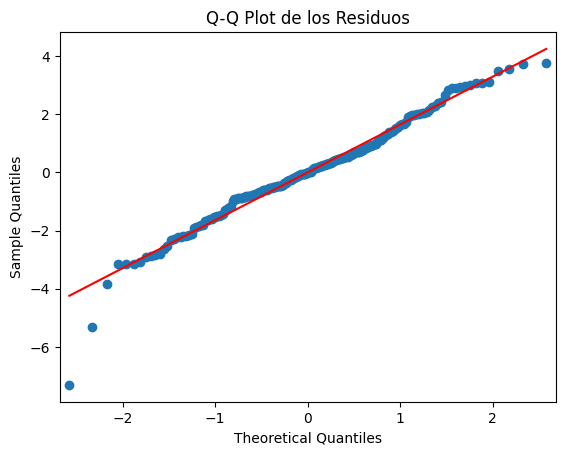

In [12]:
#Q-Q Plot
import statsmodels.api as sm

sm.qqplot(residuos, line='s')
plt.title('Q-Q Plot de los Residuos')
plt.show()

### 4.5. Evaluación del Modelo

1. Calcula las métricas: a) MSE (error cuadrático medio), b) RMSE (raíz del error cuadrático medio), c) R² (coeficiente de determinación)

2. ¿Qué nos dicen estas métricas sobre el ajuste del modelo?
. Error Cuadrático Medio (MSE): 2.7060
- Un valor bajo como este indica que las predicciones están muy cerca de los valores reales.

2. Raíz del Error Cuadrático Medio (RMSE): 1.6450
- Un RMSE de 1.6450 sugiere que, en promedio, el modelo se equivoca por menos de 2 unidades. Muy preciso.

3. Coeficiente de Determinación (R²): 0.9026
- Este valor indica que el modelo explica el 90.26 % de la variabilidad de los datos.


In [18]:
#Evaluación del Modelo
# Evaluación del modelo
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Calcular las predicciones
predichos = model.predict(X_scaled)

# Calcular MSE
mse = mean_squared_error(y, predichos)

# Calcular RMSE
rmse = np.sqrt(mse)

# Calcular R²
r_cuadrado = r2_score(y, predichos)


print(f"Error Cuadrático Medio (MSE): {mse:.4f}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse:.4f}")
print(f"Coeficiente de Determinación (R²): {r_cuadrado:.4f}")

Error Cuadrático Medio (MSE): 2.7060
Raíz del Error Cuadrático Medio (RMSE): 1.6450
Coeficiente de Determinación (R²): 0.9026


### 4.6. Visualización de Predicciones

1. Crea un gráfico comparando Sales reales vs Sales predichas.

2. Puedes usar plt.scatter(y_true, y_pred) para evaluar visualmente el ajuste.
3.¿Qué observas?¿Qué observas? ¿Qué información puedes obtener de esta gráfica?
En esta grafica podemos observar claramente que los valores reales y los predichos son muy cercanos por lo que tiene una gran presicion

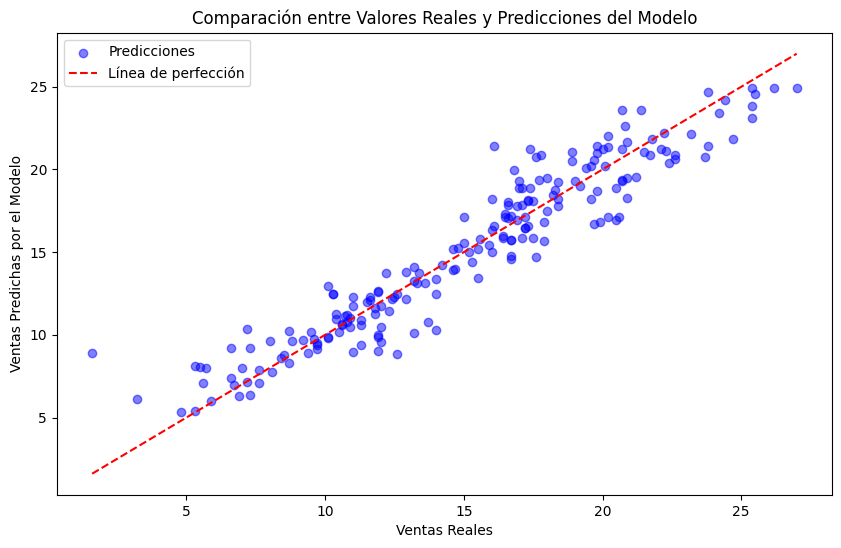


Comparación entre las predicciones y los valores reales:
   Valor Real  Predicción
0        22.1   21.220972
1        10.4   11.268248
2        12.0   10.496209
3        16.5   17.312447
4        17.9   15.644137


In [16]:
#Visualización de las Predicciones
# 10. Realizar predicciones con el modelo
import matplotlib.pyplot as plt

# 12. Graficar los valores reales frente a las predicciones
plt.figure(figsize=(10, 6))

# Graficar los valores reales vs las predicciones
plt.scatter(y, y_pred, alpha=0.5, color='blue', label='Predicciones')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label='Línea de perfección')

# Añadir título y etiquetas
plt.title("Comparación entre Valores Reales y Predicciones del Modelo")
plt.xlabel("Ventas Reales")
plt.ylabel("Ventas Predichas por el Modelo")

# Añadir leyenda
plt.legend()

# Mostrar la gráfica
plt.show()

# 11. Comparar los primeros valores reales con las predicciones
comparison = pd.DataFrame({
    'Valor Real': y.head(),
    'Predicción': y_pred[:5]  # Primeras 5 predicciones
})

print("\nComparación entre las predicciones y los valores reales:")
print(comparison)


### 4.7 Verificar el impacto de los atributos en el modelo

1. Ajusta el modelo usando statsmodels en lugar de scikit-learn para obtener los valores p.
2. Interpreta los resultados:

 - Observa los valores P>|t| en la tabla de salida.

 - ¿Qué variables tienen p-value menores a 0.05?

 - ¿Cuál es la conclusión sobre esas variables?


In [17]:
#P-values
import statsmodels.api as sm

# Agregar una constante al conjunto de datos X_scaled
X_scaled_with_constant = sm.add_constant(X_scaled)

# Ajustar el modelo de regresión lineal utilizando statsmodels
model_sm = sm.OLS(y, X_scaled_with_constant).fit()

# Imprimir el resumen del modelo
print(model_sm.summary())


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Sun, 19 Oct 2025   Prob (F-statistic):           8.13e-99
Time:                        04:38:53   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.1305      0.117    128.771      0.0

##Parte 5:  Construcción del Modelo (sin Multicolinealidad), Evaluación

En el caso de que hayas detectado variables con multicolinealidad. Elimina aquellas que presenten esta característica y realiza los mismos pasos** que la parte 4.**
Escribe cada una de las subsecciones similares a las existentes en la Parte 4.

## Parte 6: Construcción del Modelo (sin variables que no muestran una relación lineal), Evaluación

En el caso de que hayas detectado variables sin una relación lineal con la variable dependiente. Elimina aquellas que presenten esta característica y realiza lo siguiente.

En el caso de que hayas detectado variables sin una relación lineal. Elimina aquellas que presenten esta característica y realiza los mismos pasos** que la parte 4.**
Escribe cada una de las subsecciones similares a las existentes en la Parte 4.

##7. Conclusiones.

¿Cuál de los tres modelos construidos fue el mejor?
¿Cuál fue el atributo que mas influencia tiene en las ventas?
Ya que no encontre multicolinealidad ni variables que no mostraran una relación lineal no tuve que realizar estos modelos. El primero que se hizo fue muy bueno y no necesitamos realizar ningun ajuste o limpieza de los datos. Nuestra varible que tiene mayor relacion con nuestra variable dependiente (SALES) es la inversión en publicidad TV, despues Radio y al ultimo Newspaper. Lo que sugiere que a mayor inversion en publicidad de TV hay una mayor cantidad de ventas